In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot');

start = dt.datetime(2017, 6, 1)
end = dt.datetime(2018, 3, 2)

df = web.DataReader('TSLA', "yahoo", start, end)


In [2]:
print(df['Adj Close'])

Date
2017-06-01    340.369995
2017-06-02    339.850006
2017-06-05    347.320007
2017-06-06    352.850006
2017-06-07    359.649994
2017-06-08    370.000000
2017-06-09    357.320007
2017-06-12    359.010010
2017-06-13    375.950012
2017-06-14    380.660004
2017-06-15    375.339996
2017-06-16    371.399994
2017-06-19    369.799988
2017-06-20    372.239990
2017-06-21    376.399994
2017-06-22    382.609985
2017-06-23    383.450012
2017-06-26    377.489990
2017-06-27    362.369995
2017-06-28    371.239990
2017-06-29    360.750000
2017-06-30    361.609985
2017-07-03    352.619995
2017-07-05    327.089996
2017-07-06    308.829987
2017-07-07    313.220001
2017-07-10    316.049988
2017-07-11    327.220001
2017-07-12    329.519989
2017-07-13    323.410004
                 ...    
2018-01-19    350.019989
2018-01-22    351.559998
2018-01-23    352.790009
2018-01-24    345.890015
2018-01-25    337.640015
2018-01-26    342.850006
2018-01-29    349.529999
2018-01-30    345.820007
2018-01-31    354.30

In [18]:
print(df.iloc[::-1].head()) #reversed dataframe 

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-02  326.980011  335.220001  322.970001  335.119995  335.119995   
2018-03-01  345.010010  348.670013  330.070007  330.929993  330.929993   
2018-02-28  352.570007  355.239990  342.220001  343.059998  343.059998   
2018-02-27  356.250000  359.989990  350.010010  350.989990  350.989990   
2018-02-26  353.500000  359.000000  352.359985  357.420013  357.420013   

             Volume  
Date                 
2018-03-02  5092800  
2018-03-01  6885600  
2018-02-28  6069700  
2018-02-27  4797400  
2018-02-26  4340000  


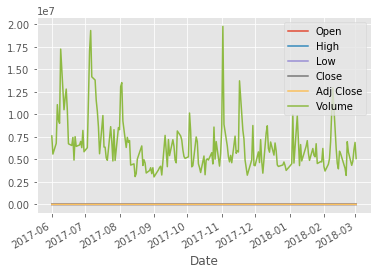

In [4]:
df.plot()
plt.show()

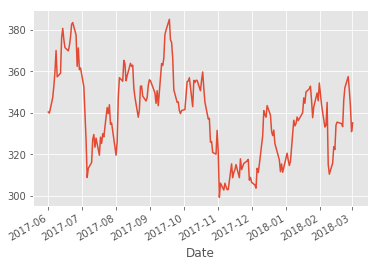

In [5]:
df['Adj Close'].plot()
plt.show()

In [5]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
#df.dropna(inplace=True)
print(df.head())

df.to_csv('TSLA.csv')

                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


In [6]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

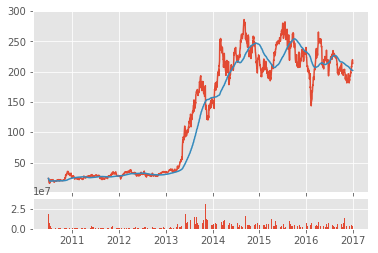

In [7]:
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [8]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)


In [9]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())


                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [10]:
df_ohlc = df_ohlc.reset_index()
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000


In [11]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [12]:
print(df_ohlc.head())

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


In [13]:
#fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1,colspan=1, sharex=ax1)
ax1.xaxis_date()

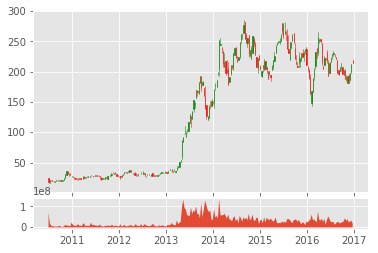

In [14]:
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [15]:
import bs4 as bs
import pickle
import requests

In [16]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')

    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers,f)


    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'CBOE',
 'KMX',
 'CCL',
 'CAT',
 'CBG',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',

In [17]:
tickersLoaded = save_sp500_tickers()

In [18]:
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import time
from random import randint as rand
import pickle

In [19]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open ("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016, 12, 31)
    
    for count,ticker in enumerate (tickers):
        if "." in ticker:         
            print( count, ticker, "had a period")
            ticker = re.sub("[.]", "-", ticker)
                
        if not os.path.exists ('stock_dfs/{}.csv'.format(ticker)):
            print( ticker)
            df = web.DataReader(ticker, "yahoo", start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            time.sleep(30+rand(0,60))
        else:
            print('Already have {}'.format(ticker))
            
            
get_data_from_yahoo()
        

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANDV
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have AJG
Already have AI

NameError: name 're' is not defined

In [ ]:
import re

ticker = "BRK-B"


if "." not in ticker: 
    df = web.DataReader(ticker, "yahoo", start, end)
    print(df.head())
else:  
    ticker2 = re.sub("[.]", "", ticker)
    print(ticker2)
    df = web.DataReader(ticker2, "yahoo", start, end)
    print(df.head())
    



In [ ]:
with open ('sp500Tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
print(tickers)

In [ ]:
def compile_data():
    with open ('sp500Tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    notLoaded = []
    
    for count,ticker in enumerate (tickers):
        if os.path.exists ('stock_dfs/{}.csv'.format(ticker)):
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
            df.rename(columns={'Adj Close': ticker}, inplace= True)
            df.drop(['Open', 'High','Low','Close','Volume'],1,inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count % 10 == 0:
                print (count)
        else:
            notLoaded.append(count)
            #print('have yet to load {}'.format(count))
    
    print("not loaded",min(notLoaded),"through",max(notLoaded))
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
        
compile_data()

In [ ]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    
    heatmap1 = ax1.pcolor(data1, cmap = plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    
                  
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

visualize_data()

In [ ]:
%matplotlib notebook


In [ ]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv',index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace = True)
    
    for i in range (1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace = True)
    
    return tickers, df

In [ ]:
df = pd.read_csv('sp500_joined_closes.csv',index_col=0)
tickers = df.columns.values.tolist()
df.fillna(0, inplace = True)

print(df['MMM'].head(),df['MMM'].shift(-1).head())


In [ ]:
day26 = 31.243397

day25 = 29.641685

day24 = 30.087738

difPct = (day25-day26)/day25




print (difPct)


In [20]:
output, df = process_data_for_labels("MMM")

df[10:20].head(10)

NameError: name 'process_data_for_labels' is not defined

In [71]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [83]:
from collections import Counter

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)] ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:' , Counter(str_vals))
    
    #clean data
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace= True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df
    
extract_featuresets("ADBE")

Data spread: Counter({'1': 2027, '-1': 1805, '0': 445})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03973534, -0.02857127,  0.        , ..., -0.02240342,
         -0.02905554, -0.02625292],
        [ 0.02896584, -0.0018384 ,  0.        , ...,  0.04375012,
          0.01246889,  0.00735268],
        ..., 
        [-0.00469483, -0.00984456, -0.00367997, ..., -0.00428123,
         -0.01068962, -0.00712317],
        [ 0.00185322,  0.00235481,  0.00738719, ...,  0.00158402,
         -0.01016939,  0.00168799],
        [ 0.0008968 ,  0.00261027, -0.00175357, ...,  0.00180767,
          0.00642124, -0.00361115]]),
 array([-1,  1,  1, ...,  0,  0,  0]),
                    MMM        ABT       ABBV         ACN       ATVI  \
 Date                                                                  
 2000-01-03   30.614885  10.056676   0.000000    0.000000   1.251975   
 2000-01-04   29.398392   9.769344   0.000000    0.000000   1.213892   
 2000-01-05   30.249941   9.751384   0.000000

In [84]:
X, y, df = extract_featuresets("ADBE")

df.head(8)

Data spread: Counter({'1': 2027, '-1': 1805, '0': 445})


,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,BBT,BDX,ADBE_1d,ADBE_2d,ADBE_3d,ADBE_4d,ADBE_5d,ADBE_6d,ADBE_7d,ADBE_target
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,30.614885,10.056676,0.0,0.0,1.251975,0.0,16.274672,15.500,0.0,31.310091,...,13.868304,19.636442,-0.083889,-0.065777,-0.058151,-0.012393,0.025739,-0.044805,-0.049571,-1
2000-01-04,29.398392,9.769344,0.0,0.0,1.213892,0.0,14.909399,14.625,0.0,30.068480,...,13.465353,19.120928,0.019771,0.028096,0.078044,0.119667,0.042664,0.037461,0.092612,1
2000-01-05,30.249941,9.751384,0.0,0.0,1.218653,0.0,15.204174,15.000,0.0,30.392372,...,13.633251,19.261518,0.008163,0.057143,0.097959,0.022449,0.017347,0.071429,0.082653,1
2000-01-06,32.682892,10.092591,0.0,0.0,1.194851,0.0,15.328290,16.000,0.0,30.635298,...,14.271255,20.058224,0.048583,0.089069,0.014170,0.009109,0.062753,0.073887,0.036437,1
2000-01-07,33.331699,10.200341,0.0,0.0,1.228173,0.0,16.072987,16.250,0.0,31.229115,...,14.371990,21.182978,0.038610,-0.032819,-0.037645,0.013513,0.024131,-0.011583,-0.025097,1
2000-01-10,33.169502,10.128510,0.0,0.0,1.290058,0.0,16.693563,17.500,0.0,32.632656,...,14.002619,20.714334,-0.068773,-0.073420,-0.024164,-0.013941,-0.048327,-0.061338,-0.051115,-1
2000-01-11,32.601810,9.984841,0.0,0.0,1.347182,0.0,15.545491,17.250,0.0,32.794617,...,13.633251,20.386280,-0.004990,0.047904,0.058882,0.021956,0.007984,0.018962,0.003992,1
2000-01-12,32.682892,9.835416,0.0,0.0,1.290058,0.0,15.467919,18.125,0.0,33.469398,...,14.080016,19.730175,0.053160,0.064193,0.027081,0.013039,0.024072,0.009027,-0.028084,1


In [77]:
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [87]:
def do_ml(ticker):
    X,y, df = extract_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.25)
    
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    
    print('predicted class counts:', Counter(predictions))
    

In [91]:
do_ml('ADBE')
do_ml('GOOGL')

Data spread: Counter({'1': 2027, '-1': 1805, '0': 445})
accuracy: 0.432710280374
predicted class counts: Counter({-1: 570, 1: 397, 0: 103})
Data spread: Counter({'0': 1624, '1': 1471, '-1': 1182})
accuracy: 0.40074906367
predicted class counts: Counter({-1: 448, 1: 352, 0: 268})
